# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
# Read the data
df = pd.read_csv("/kaggle/input/extraalearn/ExtraaLearn.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [4]:
#Display first ten rows of the data
data.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.68200,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.01500,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.98500,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.19400,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.51300,Phone Activity,No,No,No,No,No,0


In [5]:
# Display last ten rows of the data
data.tail(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4602,EXT4603,47,Professional,Website,Medium,4,339,2.06800,Email Activity,No,No,No,No,No,0
4603,EXT4604,26,Professional,Website,Medium,4,150,2.14900,Website Activity,No,No,No,No,No,0
4604,EXT4605,58,Professional,Website,Medium,2,555,3.30500,Website Activity,No,No,No,No,No,1
4605,EXT4606,49,Professional,Mobile App,Medium,5,253,3.67700,Website Activity,No,No,No,No,No,0
4606,EXT4607,58,Unemployed,Mobile App,High,7,210,3.59800,Email Activity,No,No,No,No,No,0
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [6]:
# Checking shape of the dataframe
data.shape

(4612, 15)

* **There are 4612 rows and 15 columns in the dataset**

In [7]:
# Checking data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
# Checking null values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

* **There are no null values in the dataset**

## Exploratory Data Analysis (EDA)

In [9]:
# Checking duplicates
data.duplicated().sum()

0

* **There are no duplicates in the dataset**

In [10]:
# checking if any ID occurs more than once
data['ID'].value_counts()

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64

In [11]:
# Checking unique ID's
data['ID'].nunique()

4612

In [12]:
# Dropping ID from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["ID"])

* **We can see an unique ID for each row which is not necessary for our analysis. Further data manupulation will be done after exploratory analysis as we will get more idea of interpreting the data**

---



In [13]:
# Checking statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


* **The range of age lies between 18 and 63 with an average of 46.2 and median of 51. So the age data should be skewed to the left.**

* **Website visits ranges from 0 to 30 where mean and median are respectively 3.56 and 3.00**

* **Time spent on website ranges from 0 to 2537(assuming it's in seconds) and the mean and median are respectively 724.01 and 376.00. So the distribution should be skewed towards right.**

* **Page views per visit ranges from 0 to 18.43 with a mean and median of 3.02, 2.79 respectively. As the numbers are not discrete(page number should be discrete), we can say that it's an average count.**

* **Status column only contains binary outcomes and it's our target variable. So it can be ignored for now.**

---



In [14]:
# List of all important categorical variables
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media',
           'educational_channels','referral']

# Printing the percentage number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1)*100)
    print("-" * 50)

current_occupation
Professional   56.72160
Unemployed     31.24458
Student        12.03382
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      55.11709
Mobile App   44.88291
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     49.08933
Medium   48.59063
Low       2.32003
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     49.39289
Phone Activity     26.75629
Website Activity   23.85082
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    89.22376
Yes   10.77624
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    94.94796
Yes    5.05204
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    88.57329
Yes   11.42671
Name: proportion, dtype: float64


* **As for now, we can see the percentage of unique values for each categorical feature, let's jump into univariate analysis and visualize them to get clear insight.**

---



###**Univariate Analysis**

**Defining function to visulize continuous features in histogram and boxplot**

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

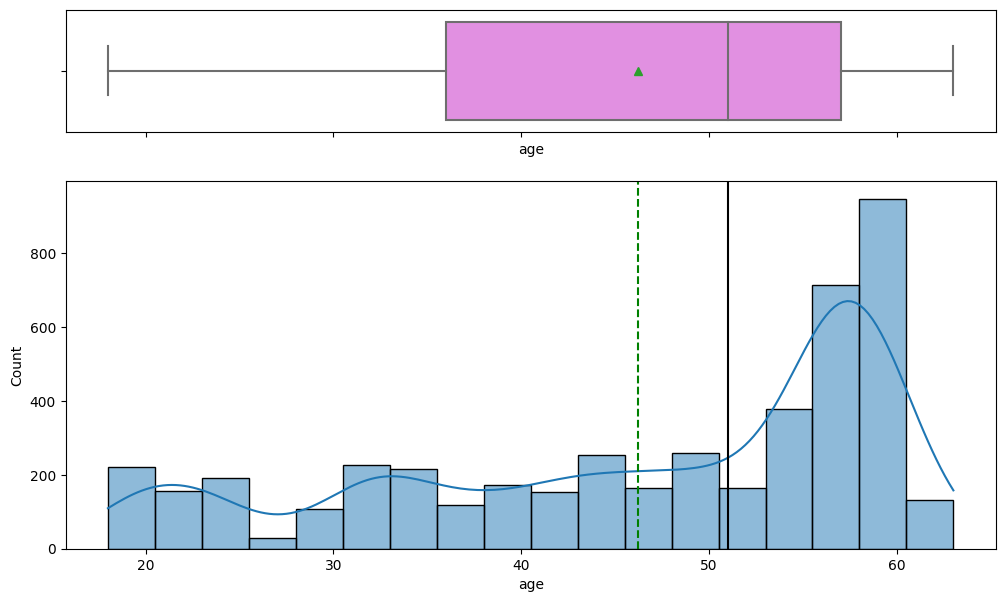

In [16]:
# observation of age

histogram_boxplot(data, "age", kde = True)

* **The age data is skewed to the left and there are no outliers.**
* **Most of the customer age lies between 50-60**

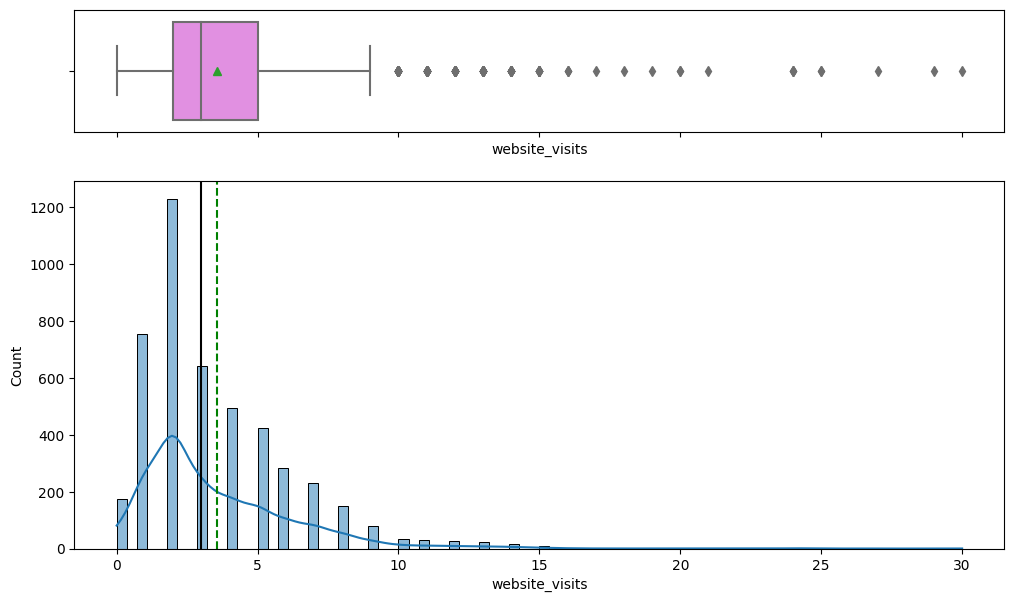

In [17]:
# observation of website visits
histogram_boxplot(data, 'website_visits', kde = True)

* **The data is slightly skewed towards right and has outliers.**
* **Very few people visits the website more than 9 days.**

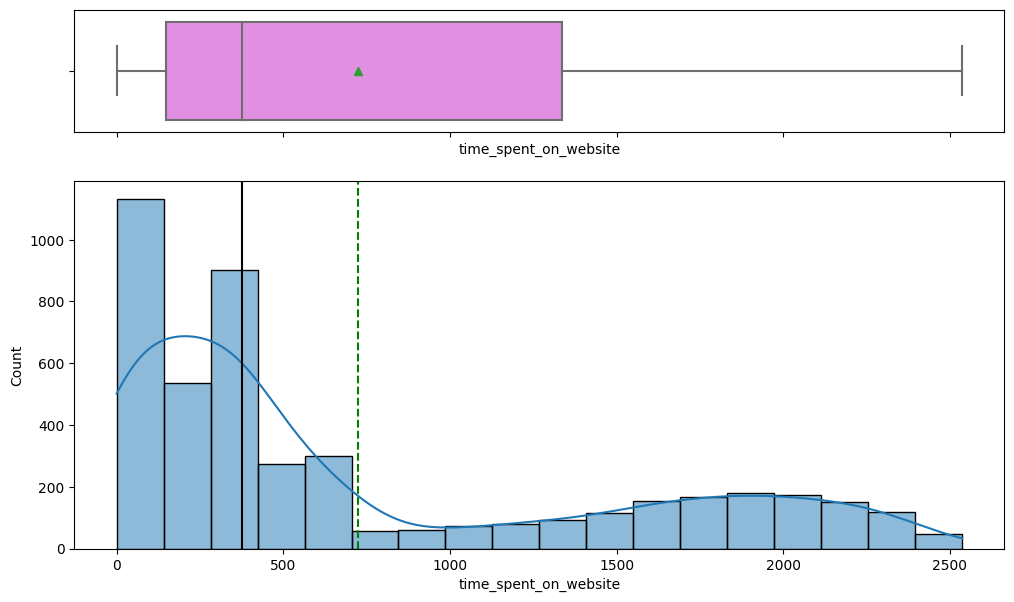

In [18]:
# observation of time spent on website
histogram_boxplot(data, 'time_spent_on_website', kde = True)

* **This data is skewed towards right and has no outliers.**

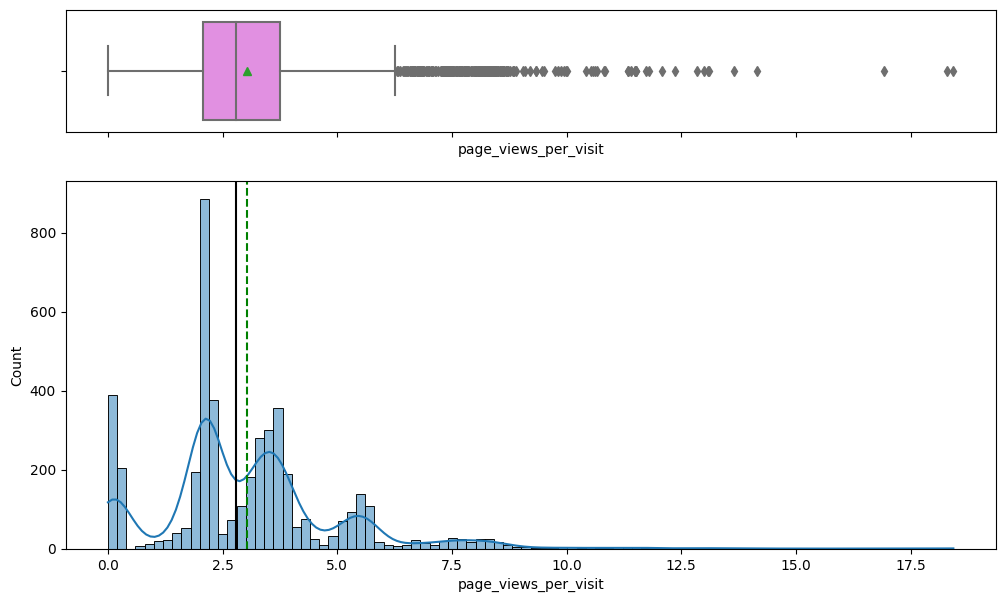

In [19]:
# observation of page views per visit
histogram_boxplot(data, 'page_views_per_visit', kde = True)

* **This data is multimodal, slightly right skewed and has ouliers.**
* **The count decreases after 6 page views per day(approax).**

**Defining function to visualize discrete categorical features in barplot**

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**For loop to visualize discrete categorical features**

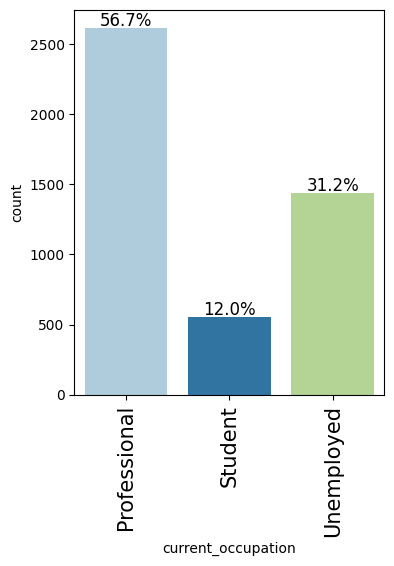

--------------------------------------------------


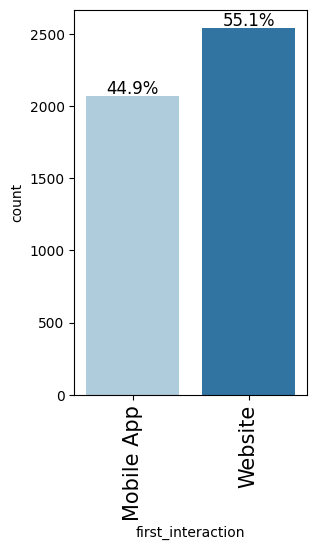

--------------------------------------------------


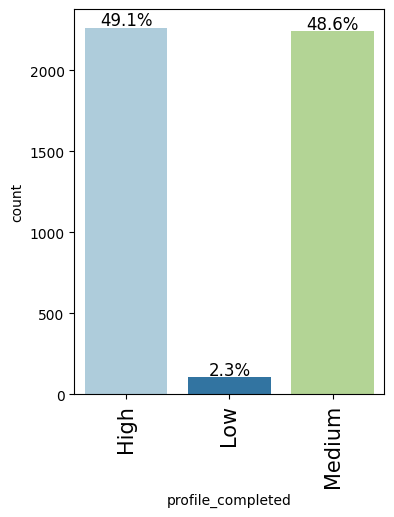

--------------------------------------------------


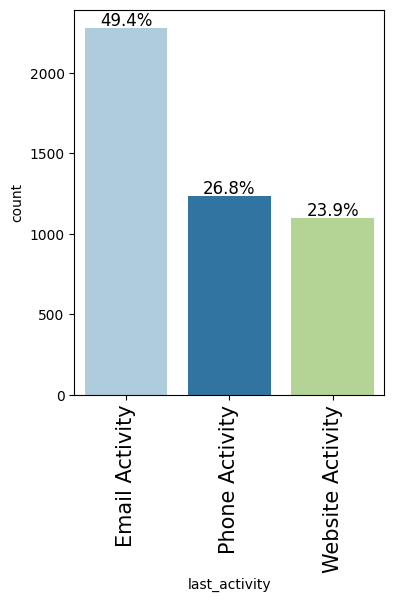

--------------------------------------------------


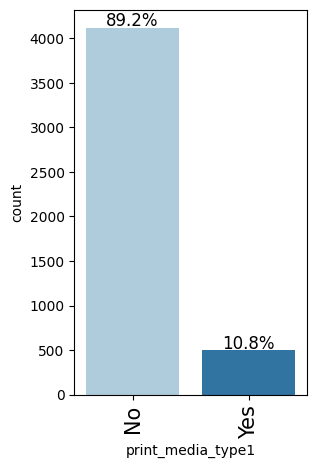

--------------------------------------------------


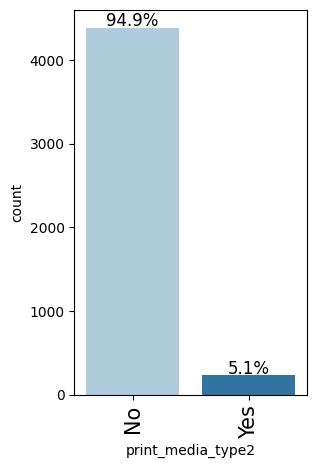

--------------------------------------------------


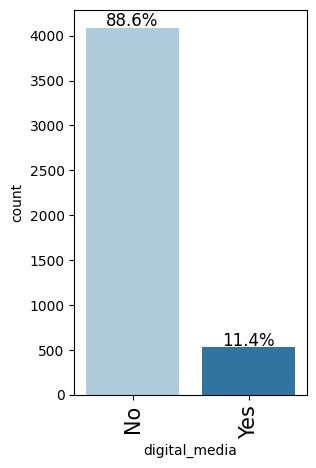

--------------------------------------------------


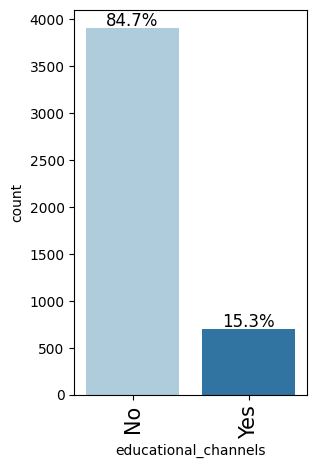

--------------------------------------------------


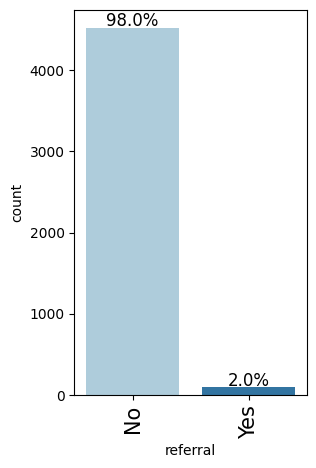

--------------------------------------------------


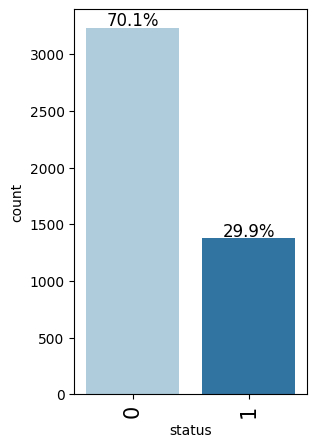

--------------------------------------------------


In [21]:
# storing discrete categorical features in a variable
dis_columns = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1', 'print_media_type2','digital_media','educational_channels',
           'referral','status']

# creating for loop to visulaize unique value percentages for each features in barplot
for i in dis_columns:
  labeled_barplot(data,i, perc= True)
  print("-" * 50)

* **We can see the current_occupation column contains three unique categories that are : Professional(56.7%), Unemployed(31.2%) and Student(12%).**

* **55.1% leads had their first interaction through website whereas 44.9% through mobile.**

* **49.1% leads has High profile completion followed by 48.6% Medium and 2.3% Low.**

* **Regarding last activity, 49.4% leads interacted through Email, followed by 26.8% via phone and 23.9% via website.**

* **10.8% of the leads seen ad in the Newspaper, 89.2% didn't.**

* **5.1% of the leads seen ad in the Magazine, 94.9% didn't.**

* **11.4% of the leads seen ad in digital platforms, 88.6% didn't.**

* **15.3% of the leads seen ad in education channels like online forums, discussion threads, educational websites, etc. 88.6% didn't.**

* **2% of the leads heard about ExtraaLearn through reference.**

* **So, if we sum up, turns out 44.4% of the leads came from those five channles. But we have to keep in mind that, there are also some leads who saw ads on various platforms.**

---



### **Bivariate Analysis**

**Let's check the correlation between numeric variables**

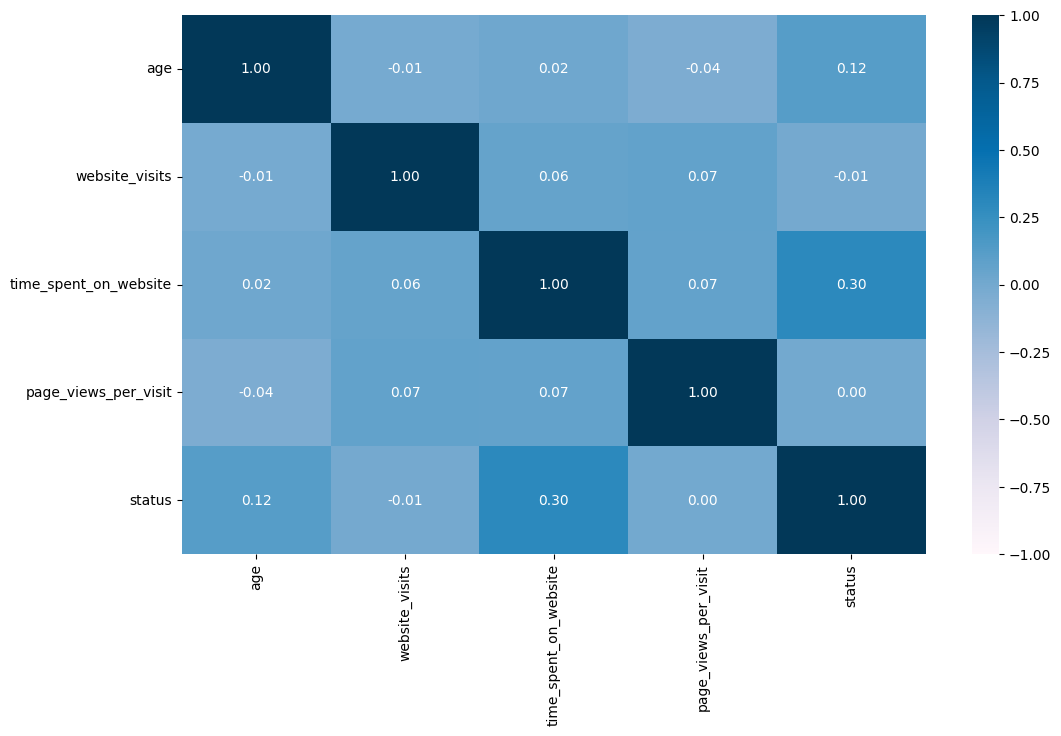

In [22]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='PuBu'
)
plt.show()

* **Status and time spent on website has a positive correlation of 0.30 which is a useful information as we want to build a model to predict status.**

* **Age and Satus has a positive correlation of 0.12**

* **Website visits and Page views per visit has no correlation with status (-0.01 and 0.00 respectively)**

* **Other variables have no significant correlation with one another.**

---



**Let's see how differnet features relate with our target variable 'status' to get more insights.**

**Let's define a functions to plot distributions such as boxplot, histogram, stacked barplot with crosstable**

In [23]:
### Function to plot distributions with respect to the target variable

def distribution_plot_wrt_target(data, predictor, target):
    # Create a 2x2 grid of subplots for data visualization
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get unique values of the target variable
    target_uniq = data[target].unique()

    # Plot 1: Distribution of the predictor for the first target class
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Plot 2: Distribution of the predictor for the second target class
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Plot 3: Boxplot with respect to the target variable
    axs[1, 0].set_title("Boxplot with respect to target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="cubehelix")

    # Plot 4: Boxplot without outliers with respect to the target variable
    axs[1, 1].set_title("Boxplot (without outliers) with respect to target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="RdBu_r",
    )

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [24]:
### function to plot stacked barplot with respect to target

def stacked_barplot(data, predictor, target, color_palette=None):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    color_palette: a list of colors to use for the bars (optional)
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    # Print the crosstab table
    print(tab1)
    print("-" * 120)

    # Calculate the crosstab with percentages
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )



    # Set a custom color palette if provided, otherwise, use default colors
    if color_palette:
        sns.set_palette(color_palette)

    # Plot the stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    # Display percentages on top of the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1%}', (x + width / 2, y + height/2), ha='center', va='center')

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xlabel(predictor)
    plt.ylabel("Percentage")
    plt.title(f"Stacked Bar Chart with Percentages for {predictor} vs. {target}")
    plt.show()


status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


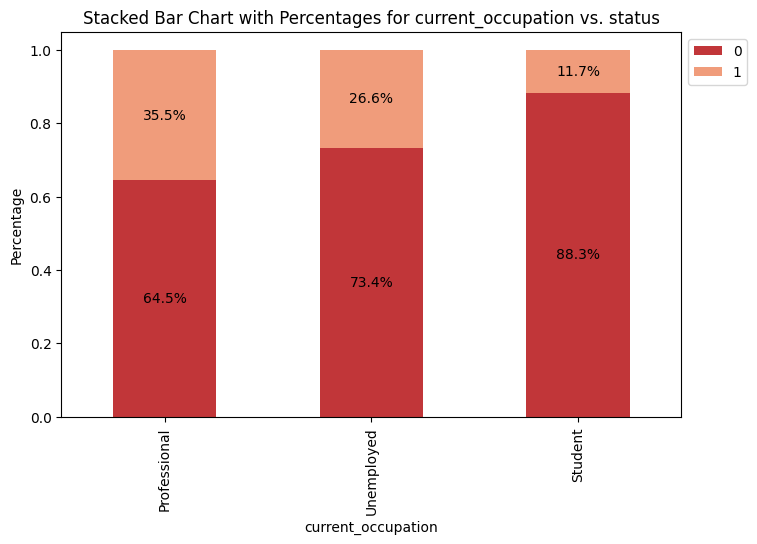

In [25]:
# Calling the stacked_barplot function with current occupation and status
stacked_barplot(data, "current_occupation", "status",color_palette='RdGy')

* **35.5% of the professionals converted into a paid customers, followed by 26.6% and 11.7% for Unemployed and student respectively.**

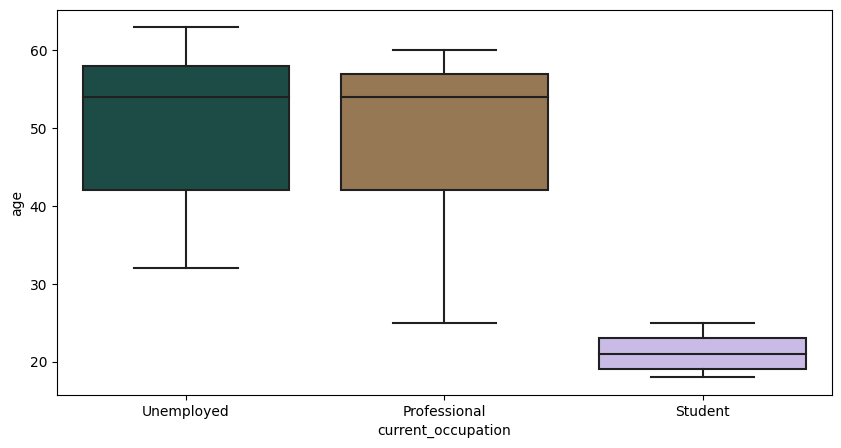

In [26]:
# Plotting boxplot with current occupation and age
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"], palette = 'cubehelix')
plt.show()

In [27]:
# checking summary of age with respect to current occupation
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


* **Professional and Unemployed falls in higher age group(25-63 together) than students(18-25). So, most likely age play an important role to predict status as professionals and unemployed has higher conversion rate. Moreover, we have also seen a positive correlation o f 0.12 between age and status.**

* **Professional and Unemployed both has median of 54 and their mean are almost similar.**

---

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


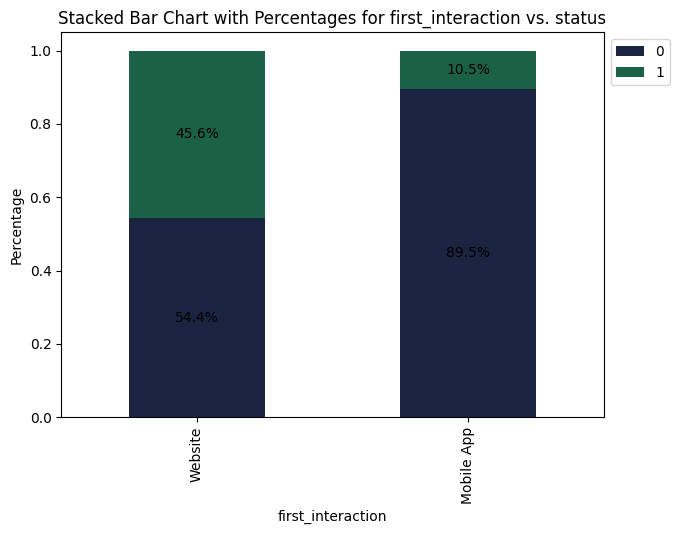

In [28]:
# Calling the stacked_barplot function with first inertaction and status
stacked_barplot(data, 'first_interaction', 'status', color_palette = 'cubehelix')

* **Leads that first interacted through website has 45.6%conversion rate whereas mobile app has 10.5% conversion rate.**

---



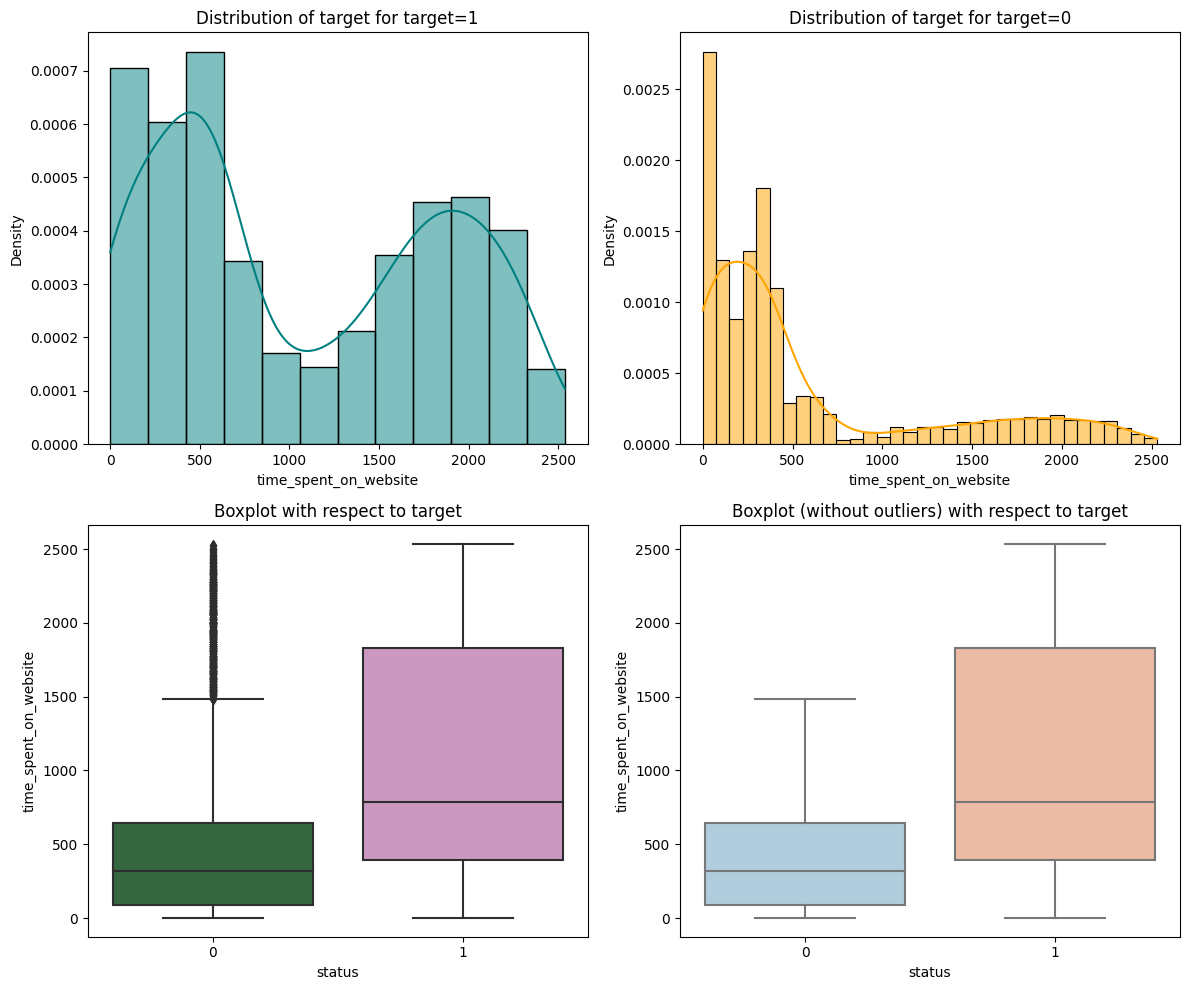

In [29]:
# Calling distribution_plot_wrt_target function of time spent on website with respect to target
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [30]:
# checking statistical summary
data.groupby(["status"])["time_spent_on_website"].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.00000,577.42071,676.34048,0.00000,88.00000,317.00000,646.00000,2531.00000
1,1377.00000,1068.39797,780.85664,0.00000,390.00000,789.00000,1829.00000,2537.00000


* **Leads who spent more time on website tends to convert into a paid customer**

* **There are some outliers in 'status == 0' which suggest that not always when a lead spends more time on website will convert to a paid customer. But when the time is less then around 400, we can see no conversion.**

---



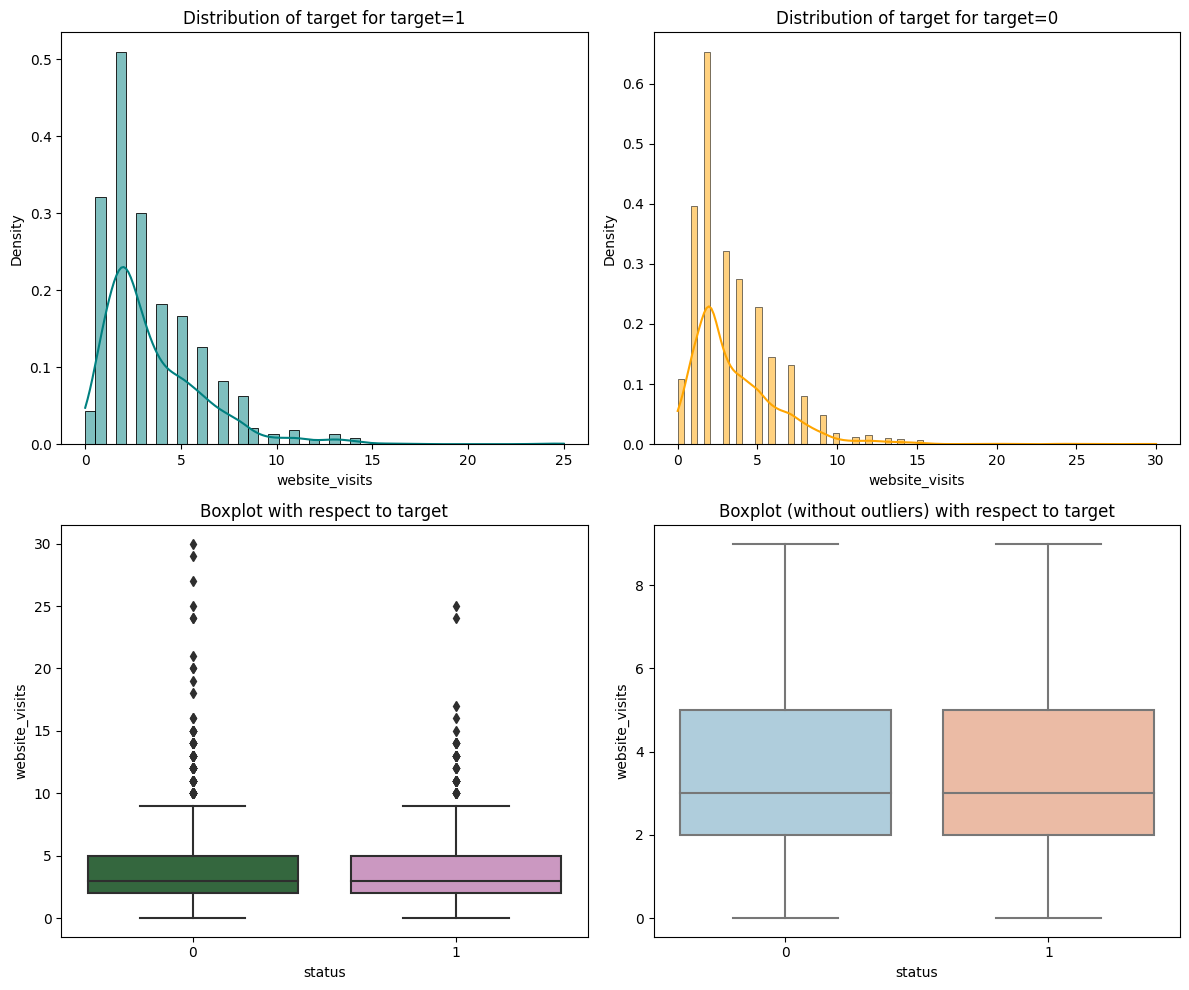

In [31]:
# Calling distribution_plot_wrt_target function of website visits with respect to target
distribution_plot_wrt_target(data, 'website_visits', 'status')

**Website visits feature follows almost similar distribution with respect to status 0 and 1. We can say this feature is not that good in terms of predicting our target variable.**

---



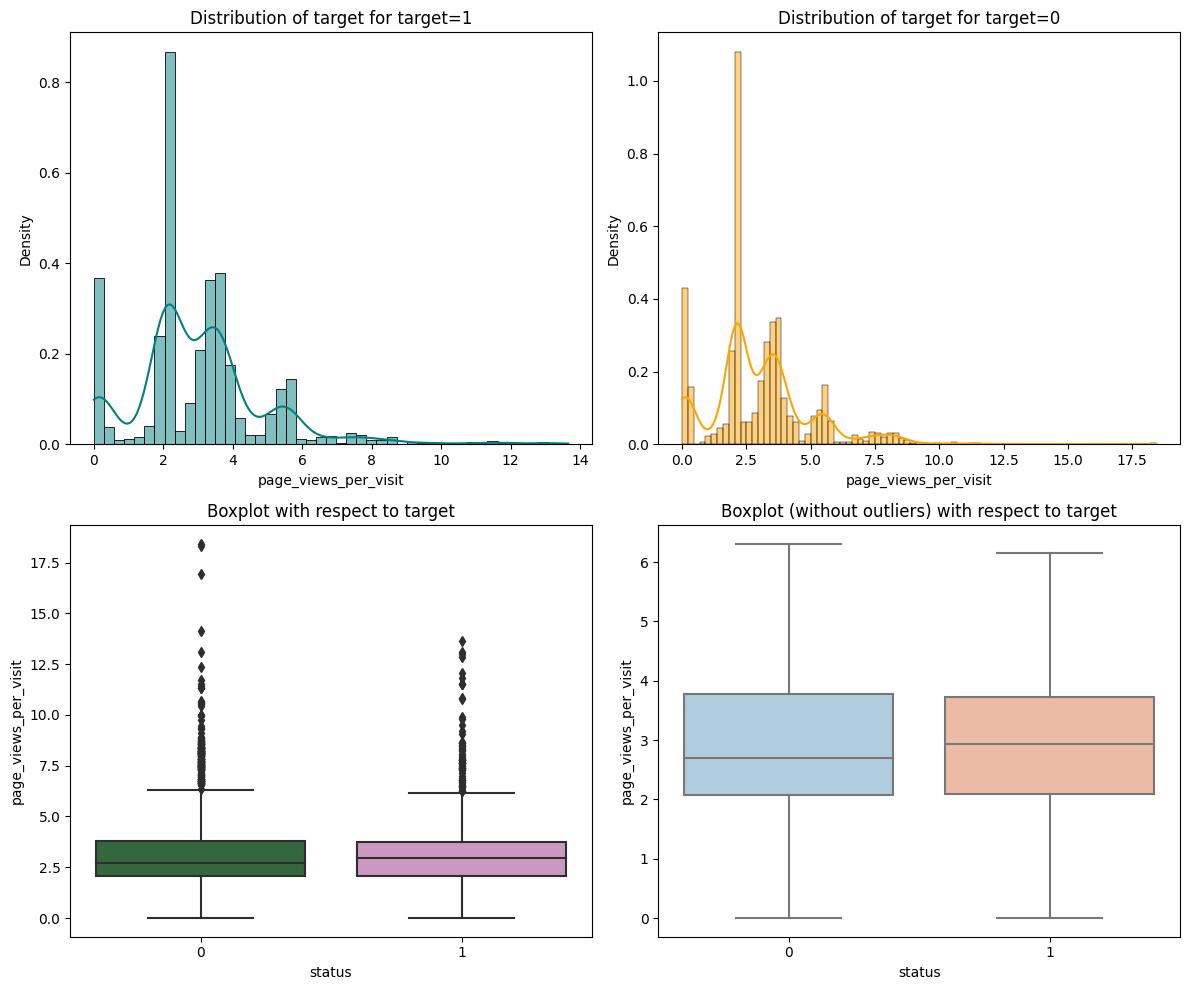

In [32]:
# Calling distribution_plot_wrt_target function of page views per visit with respect to target
distribution_plot_wrt_target(data, 'page_views_per_visit', 'status')

In [33]:
# checking the median value
data.groupby(["status"])["page_views_per_visit"].median()

status
0   2.70600
1   2.93500
Name: page_views_per_visit, dtype: float64

* **Pages views per visit follows almost similar distribution with respect to status 0 and 1. We can say this feature is probably not that good in terms of predicting our target variable.**

---



status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


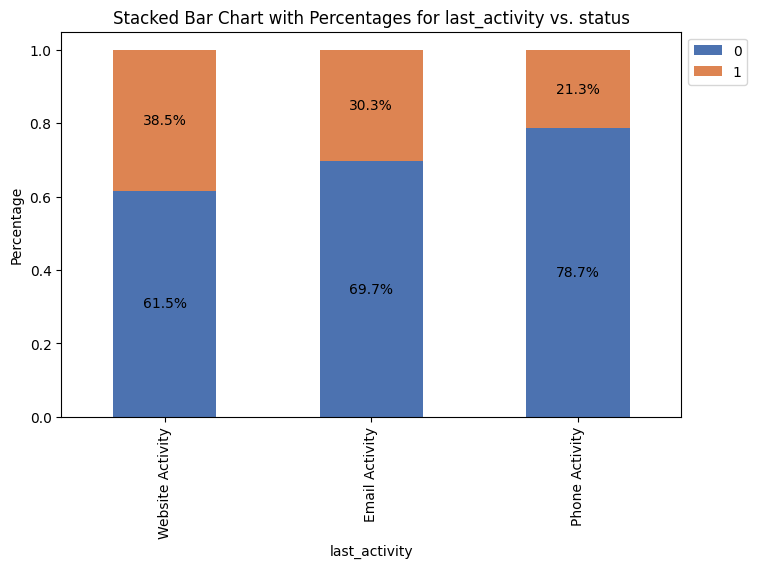

In [34]:
# Calling stacked_barplot function of last activity and status
stacked_barplot(data, "last_activity", "status", color_palette = 'deep')

* **Website Activity has highest conversion rate (38.5%) followed by Email activity (30.3%) and Phone activity (21.3%) with respect to status.**

---



profile_completed  High  Low  Medium   All
first_interaction                         
All                2264  107    2241  4612
Website            1250   63    1229  2542
Mobile App         1014   44    1012  2070
------------------------------------------------------------------------------------------------------------------------


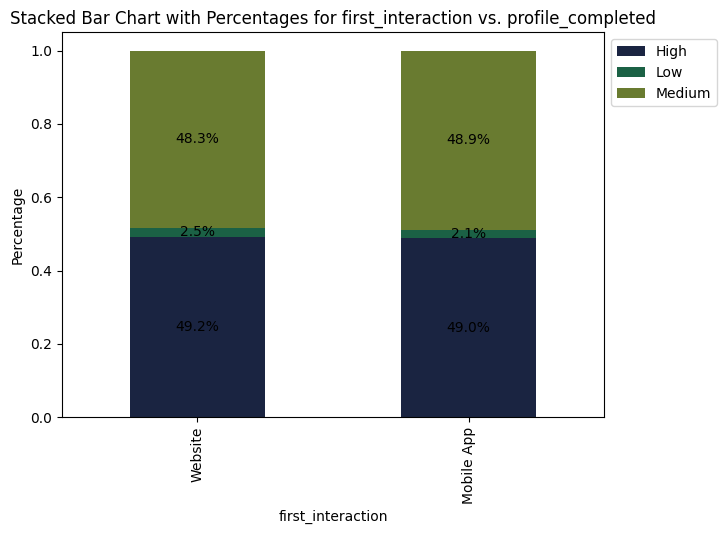

In [35]:
# Calling stacked_barplot function of first interaction and status
stacked_barplot(data, "first_interaction", "profile_completed" , color_palette = 'cubehelix')

* **The ratio of high, medium and low profile completion in terms of first interaction through website and mobile app are almost similar.**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


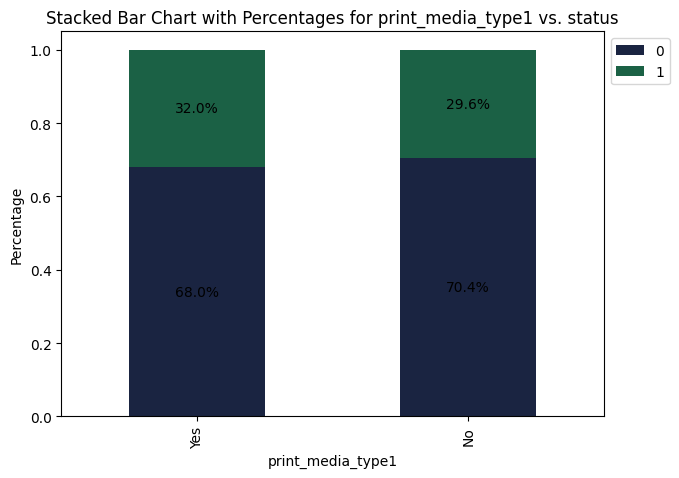

----------------------------------------------------------------------
status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


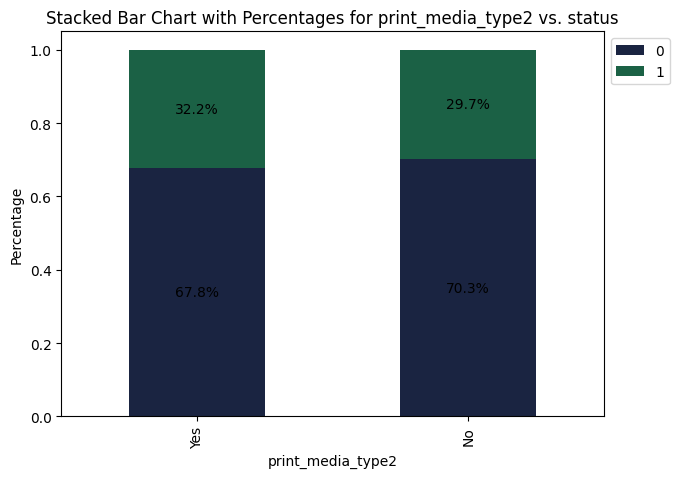

----------------------------------------------------------------------
status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


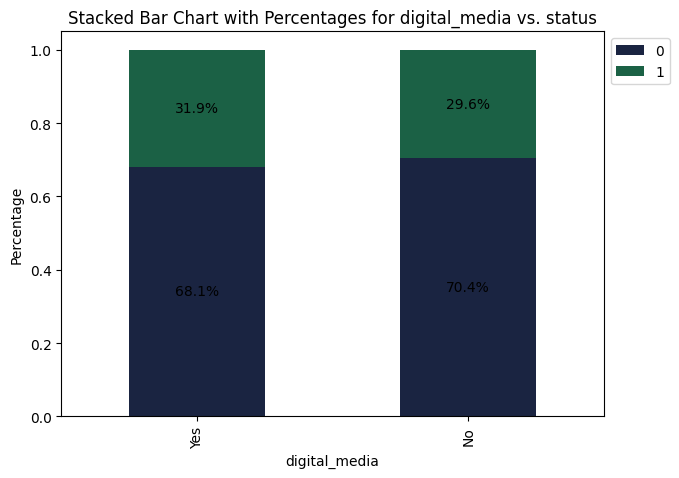

----------------------------------------------------------------------
status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


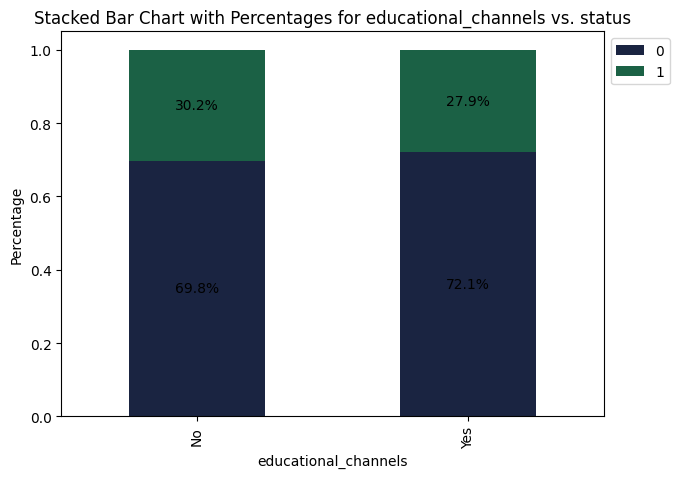

----------------------------------------------------------------------
status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


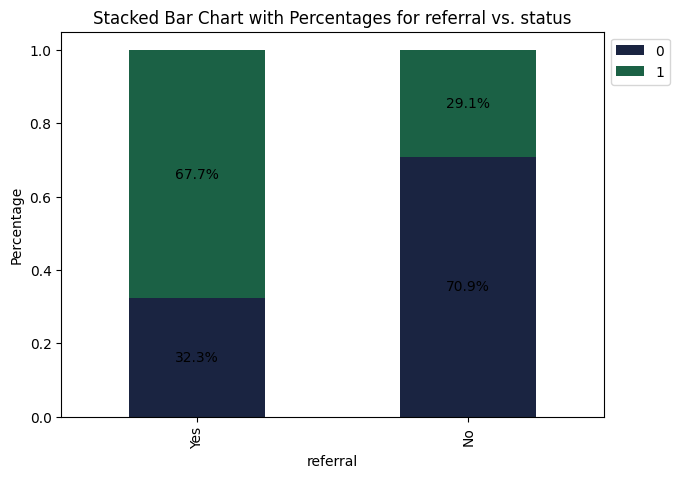

----------------------------------------------------------------------


In [36]:
# Calling the 'stacked_barplot' function with specific arguments for different advertising columns

# List of advertising columns to visualize
ad_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Iterate through the advertising columns and create stacked bar plots
for i in ad_columns:
    stacked_barplot(data, i, 'status', color_palette='cubehelix')

    # Printing a separator line for clarity
    print('-' * 70)


In [37]:
#creating dataframe to see the percentages clearly

d = []

for channel in ad_columns:
    # Users who have seen the ad in channel
    have_seen = df[df[channel]=='Yes']
    # Counts of converted (1) vs. non-converted (0) users
    counts = have_seen['status'].value_counts(normalize = True)*100
    # Conversion rate
    d.append(counts[1])

display(pd.DataFrame(d, columns=['conversion_rate'], index=ad_columns).sort_values(by='conversion_rate', ascending=False))

,conversion_rate
referral,67.74194
print_media_type2,32.18884
print_media_type1,31.99195
digital_media,31.87856
educational_channels,27.94326


**In term of ads:**

* **32% of the Leads converted into paid user who saw ads in newpaper, 29.6% converted without seeing the ad on newspaper.**

* **32.2% of the Leads converted into paid user who saw ads in magazine, 29.7% converted without seeing the ad in magazine.**

* **31.9% of the Leads converted into paid user who saw ads in digital media platforms, 29.6% converted without seeing the ad in digital media platforms.**

* **27.9% of the Leads converted into paid user who saw ads in education channels, 30.2% converted without seeing the ad in education channels.**

* **67.7% of the Leads converted into paid user who had heard about ExtraaLearn through reference, 29.1% converted without referral.**

---



**Point to be Noted : There are also some leads who did not see any ad in the five platform that is mentioned in the dataset, yet converted to a paid user. May be they saw ads in different platforms.**

---



###**Detecting Outliers**

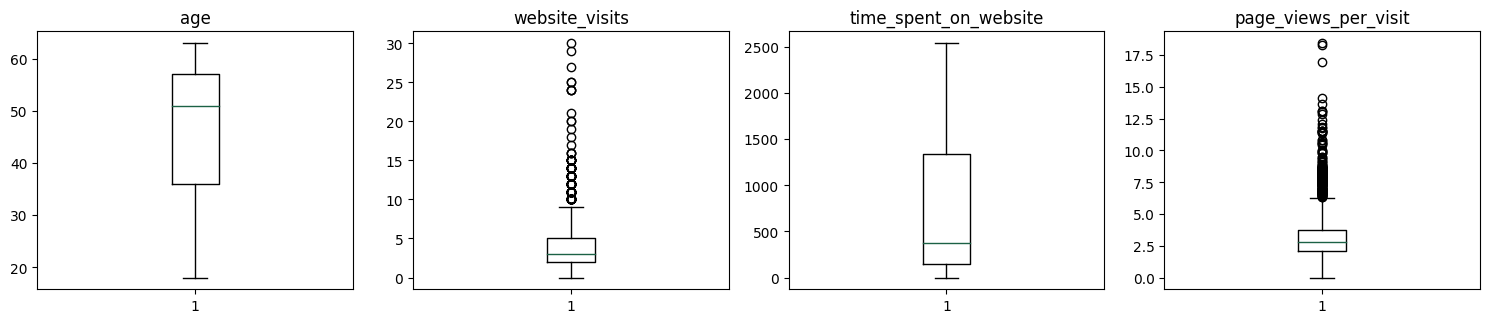

In [38]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping status column
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* **As we can see, 'website_visits' and 'page_views_per_visit' features may not be a good predictor for our target variable. So, it will be better to drop the features(if necessary) rather than dropping the rows that contains outliers as we may also loss other important feature values which is valuable to predict. But before dropping the features let's go ahead and find out if these features are actually valuable or not.**

* **It is not impossible that a lead visits website more than 10 times and visits more than 6 pages per visit on average. So, dropping those features may not be a good idea.**

---



## **Data Preparation for modeling**

In [39]:
# storing independant and target features in different variable

X = data.drop(['status'], axis=1) # independant variables
Y = data['status'] # target variable

**Before jumping into training the model, we need to convert categorical variables to numeric.**

In [40]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
X = pd.get_dummies(
    X,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [41]:
# Checking training data
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,True,False,True,False,False,False,False,False,False,False,False,False


In [42]:
# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [43]:
# Checking the shape of training and test with their size in percentage

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


* **We can see, the ratio for both classes for our target variable in training and test set are similar.**

## **Building Classification Models**

### **Which case is more important?**

* The business will lose a potential client if we anticipate that a lead won't convert when it actually would have.

* If we predict that a lead would convert but it doesn't, the business may waste resources by generating false-positive cases.

**Losing a potential customer is a greater loss. So, the recall should be maximized as it will reduce False Negatives.**

* **Note that the company did not mention any budget about maximum resource loss/ budget. while aimimg for high recall, we may loss precision. So, a low precision might cause severe resource loss.**

In [44]:
# Define a function named 'metrics_score' that takes 'actual' and 'predicted' values as input
def metrics_score(actual, predicted):

    # Print the classification report, which provides various metrics for evaluating model performance
    print(classification_report(actual, predicted))

    # Calculate the confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives
    cm = confusion_matrix(actual, predicted)

    # Create a figure and set its size
    plt.figure(figsize=(8, 5))

    # Create a heatmap of the confusion matrix with annotations and formatting
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])

    # Set labels for the y-axis and x-axis
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Display the heatmap
    plt.show()

## Building a Decision Tree model

In [45]:
# creating decision tree

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(random_state=7)

In [46]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the parameters of the classifier**

In [47]:
# Checking the parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 7,
 'splitter': 'best'}

F1 score for training set = 1.0
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



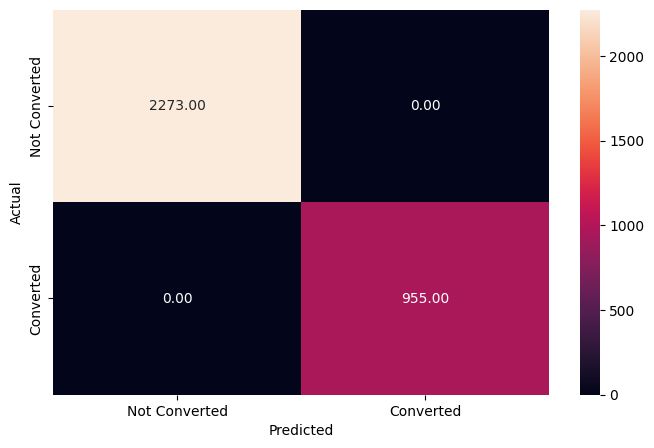

In [48]:
# Predicting on the training data using the Decision Tree model (clf)
y_pred_train1 = clf.predict(X_train)  # Storing model predictions for the training data

# Printing the F1 score for the training set
print('F1 score for training set =', f1_score(y_train, y_pred_train1))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the training set
metrics_score(y_train, y_pred_train1)

F1 score for test set = 0.6972909305064782
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



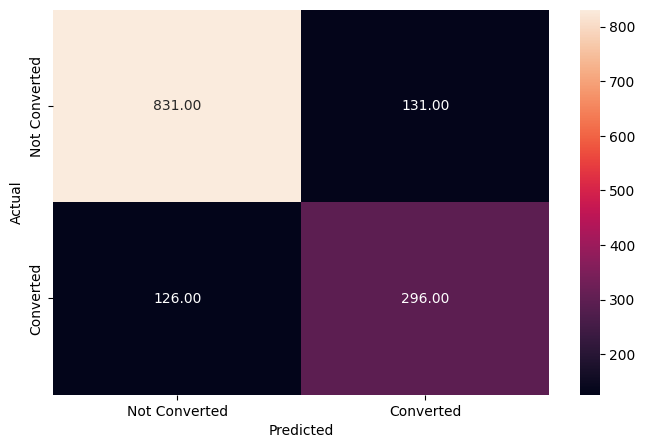

In [49]:
# Predicting on the test data using the Decision Tree model (clf)
y_pred_test1 = clf.predict(X_test)  # Storing model predictions for the test data

# Printing the F1 score for the test set
print('F1 score for test set =', f1_score(y_test, y_pred_test1))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the test set
metrics_score(y_test, y_pred_test1)

* **Our model is clearly overfitting as it's doing great on traing data(100%) but failed to predict well on unseen/test data. So we need to perform hyperparameter tuning.**

---




## Do we need to prune the tree?

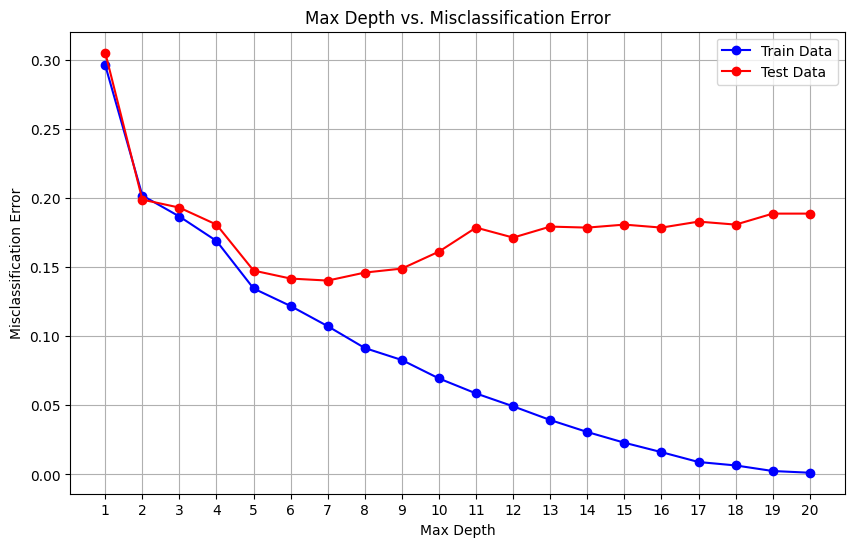

In [50]:
# Create empty lists to store training and test misclassification errors
train_errors = []
test_errors = []

# Define a range of maximum depths to explore
max_depths = range(1, 21)

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)

for max_depth in max_depths:
    # Create and train a Decision Tree classifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = clf.predict(X_train)

    # Make predictions on the test data
    y_test_pred = clf.predict(X_test)

    # Calculate misclassification errors for training and test data
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Append the errors to the respective lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the max depth vs. misclassification error graph for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, marker='o', linestyle='-', color='b', label='Train Data')
plt.plot(max_depths, test_errors, marker='o', linestyle='-', color='r', label='Test Data')
plt.title('Max Depth vs. Misclassification Error')
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error')
plt.grid(True)
plt.xticks(max_depths)
plt.legend()
plt.show()

* **From the graph above, we can clearly see the missclassification error differences at depth 20 which is pretty huge. So we need to prune/ reduce the depth to a sweetspot where the errors does not differ that much.**

##**Decision Tree - Hyperparameter Tuning**

* As 1 is the minority class and we are also interested in predicting this class more accurately, we should tell our model to give more importance to this class. We can also use oversampling technique but let us not do it for now.

In [51]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7}) #class_weight would tell the model that 1 is the important class here

# Grid of parameters to choose from
parameters = {
              'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [4, 5, 6, 8, 10, 15, 20, 25],
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

#Fitting training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=4, random_state=7)

F1 score for training set = 0.7253886010362695
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



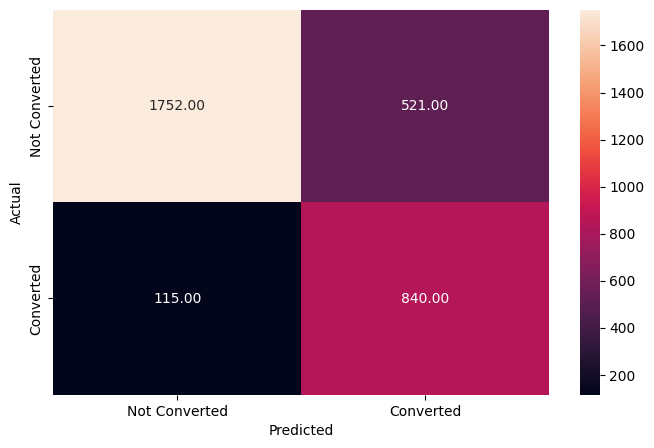

In [52]:
# Predicting on the training data using the tuned Decision Tree model
y_pred_train2 = d_tree_tuned.predict(X_train)  # Storing model predictions for the training data

# Printing the F1 score for the training set
print('F1 score for training set =', f1_score(y_train, y_pred_train2))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the training set
metrics_score(y_train, y_pred_train2)

F1 score for test set = 0.722057368941642
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



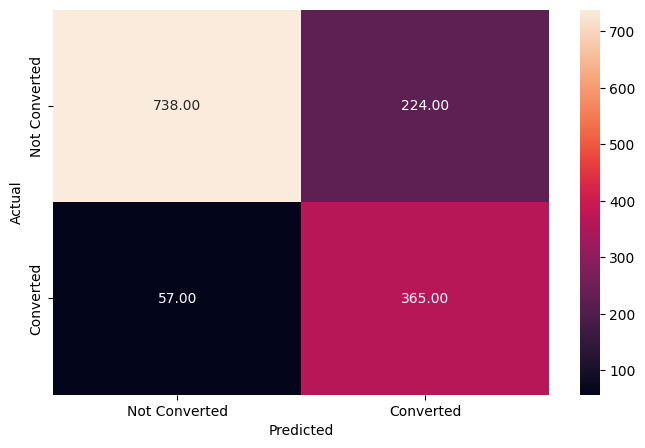

In [53]:
# Predicting on the test data using the tuned Decision Tree model
y_pred_test2 = d_tree_tuned.predict(X_test)  # Storing model predictions for the test data

# Printing the F1 score for the test set
print('F1 score for test set =', f1_score(y_test, y_pred_test2))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the test set
metrics_score(y_test, y_pred_test2)

* **After tuning hyparameter we can see that the overfitting issue drops significantly. The recall value for 1 jumps from 0.70 to 0.86 in the test set as we told the classifier to give this class more importance**

---



**Visualizing the Decision Tree**

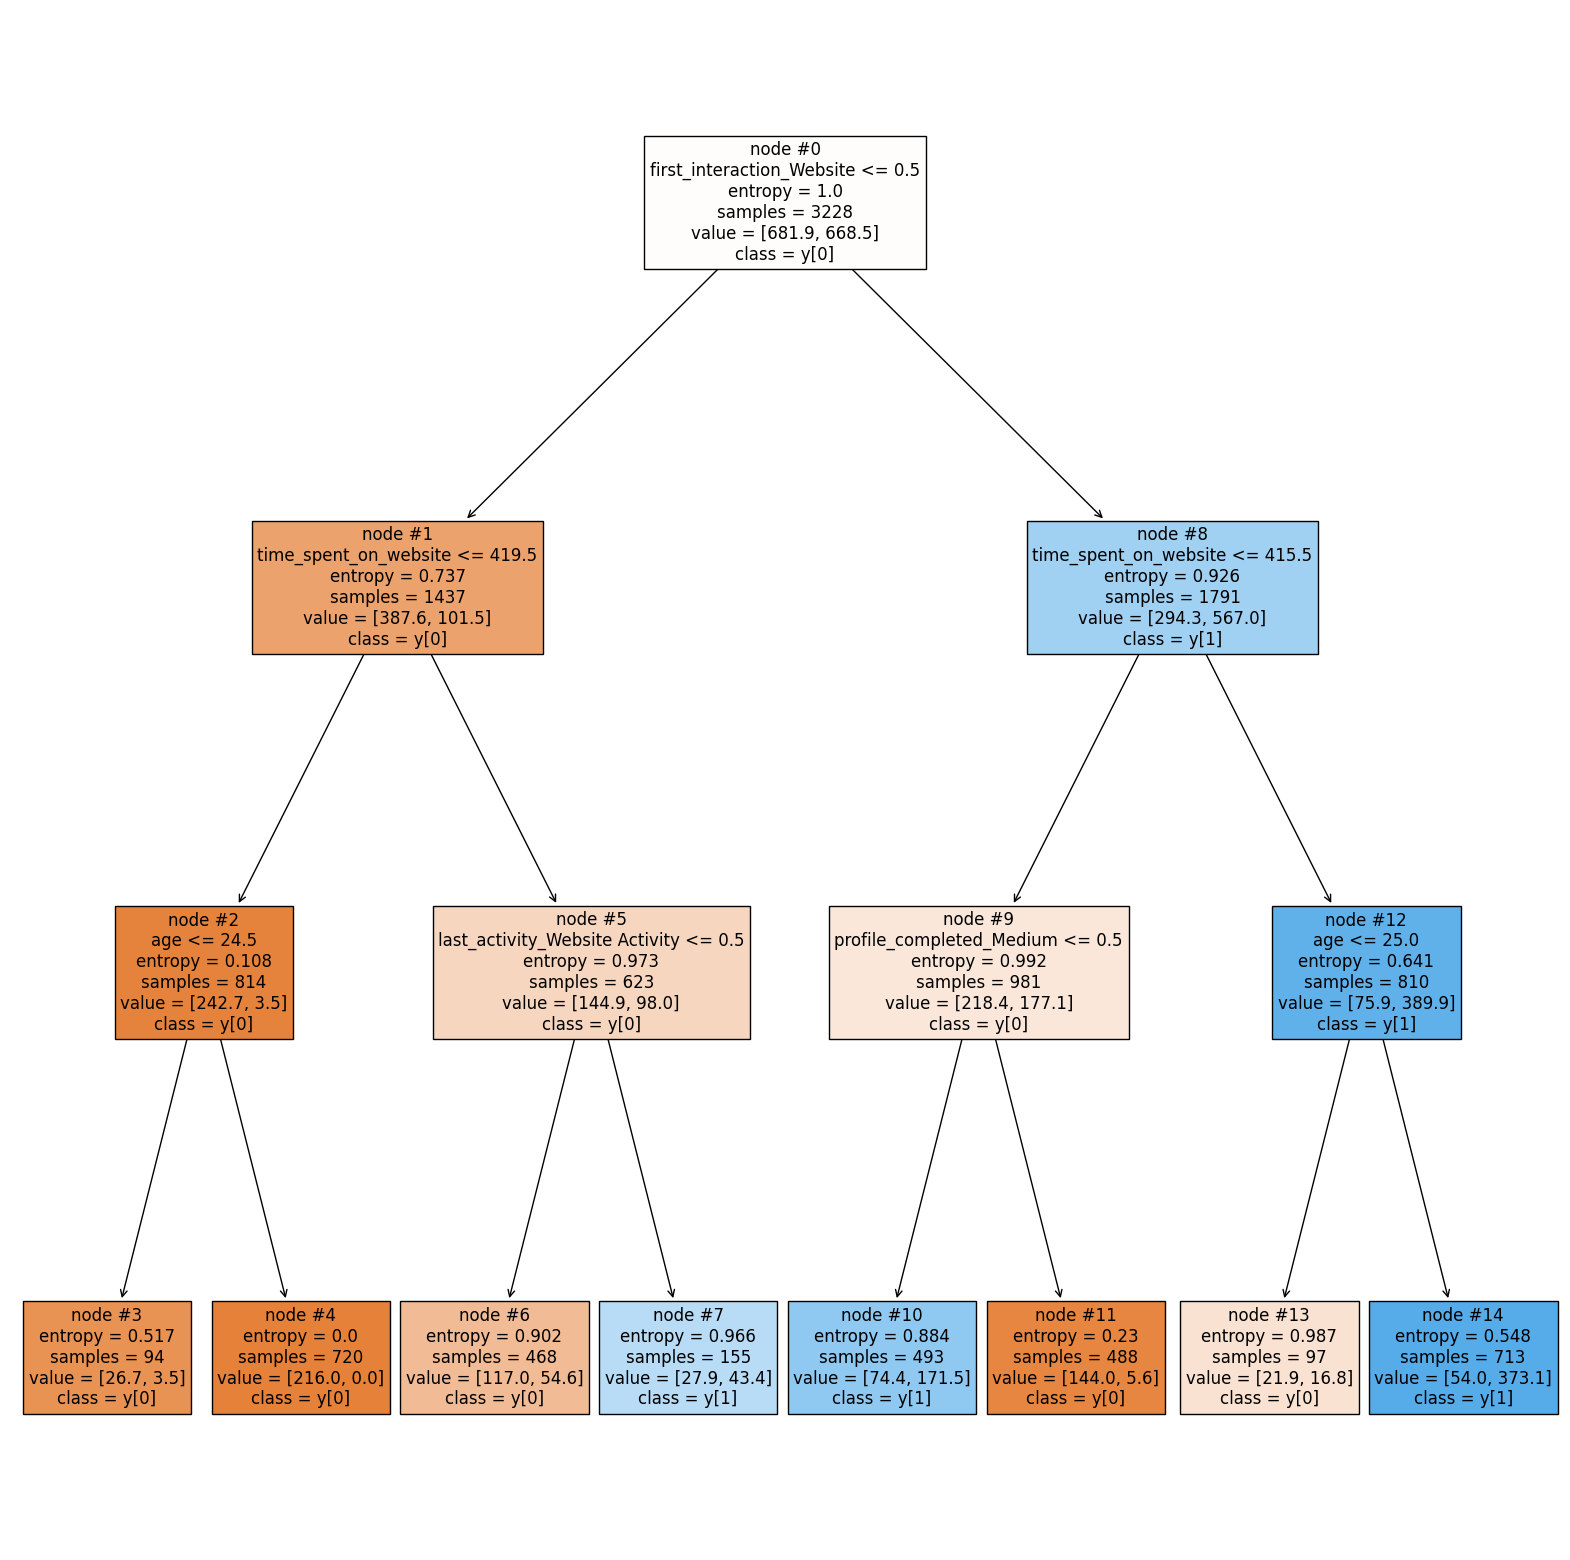

In [54]:
# List of feature names extracted from the DataFrame X
features = list(X.columns)

# Create a figure and set its size
plt.figure(figsize=(20, 20))

# Plot the decision tree using the plot_tree function
tree.plot_tree(d_tree_tuned, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)

# Display the plotted decision tree
plt.show()

**Let's see the tree in text format**

In [55]:
print(tree.export_text(d_tree_tuned, feature_names=X_train.columns.tolist(), show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [26.70, 3.50] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [216.00, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [117.00, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 43.40] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [74.40, 171.50] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [144.00, 5.60] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- age <= 25.00
|   |   |   |--- weights: [21.90, 16.80] class: 0
|   |   |--- age >  25.00
|   |   |   |--- weights: [54.00, 373.10] class: 1



**Observations :**

- **Root Node :** first_interaction_Website <= 0.50. This is the starting point of the decision tree, which means that the first_interaction_Website results in the highest information gain among all the features. If the value is less than or equal to 0.5,  the left branch is taken, and if it is greater than 0.5, the right branch is taken.

- **Internal Nodes:**
   - time_spent_on_website <= 419.50
   - age <= 24.50
   - last_activity_Website Activity <= 0.50
   - time_spent_on_website <= 415.50
   - profile_completed_Medium <= 0.50
   - age <= 25.00

In [56]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


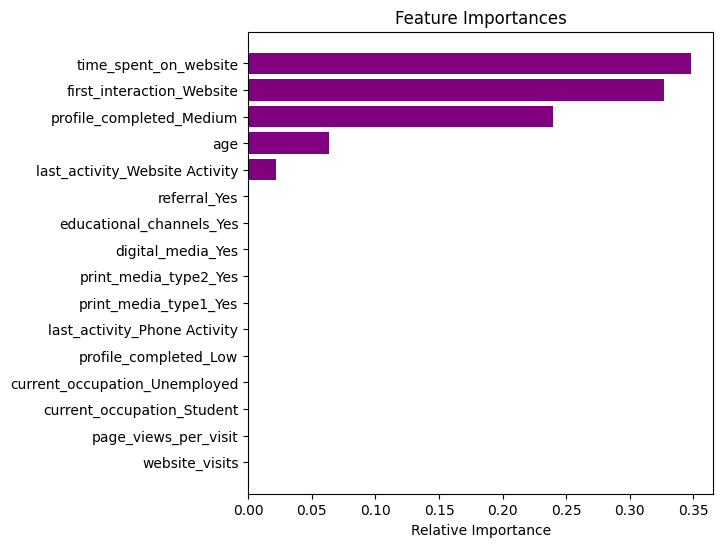

In [57]:
# Calculate feature importances from the trained decision tree model
importances = d_tree_tuned.feature_importances_

# Sort feature importances and get the corresponding indices
indices = np.argsort(importances)

# Extract the list of feature names from the DataFrame X
feature_names = list(X.columns)

# Create a figure and set its size
plt.figure(figsize=(6, 6))

# Set the title for the plot
plt.title('Feature Importances')

# Create a horizontal bar plot to visualize feature importances
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')

# Set y-axis ticks and labels to display the feature names
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Label the x-axis
plt.xlabel('Relative Importance')

# Display the plot
plt.show()


* **Important features to build the decision tree:**
  - time_spent_on_website          (0.34814)
  - first_interaction_Website      (0.32718)
  - profile_completed_Medium       (0.23927)
  - age                            (0.06389)
  - last_activity_Website Activity  (0.02151)

  **Other features has no impact on building the decision tree.**

## Building a Random Forest model

**As we have trained our data on a single decision decision tree, Let's see how does it perform on a multiple tree classifier called Random Forest.**

In [58]:
# Creating a Random Forest Classifier with specified parameters

rf = RandomForestClassifier(criterion = "entropy", random_state = 7)

In [59]:
# Fit the Random Forest Classifier to the training data

rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

F1 score for training set = 1.0
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



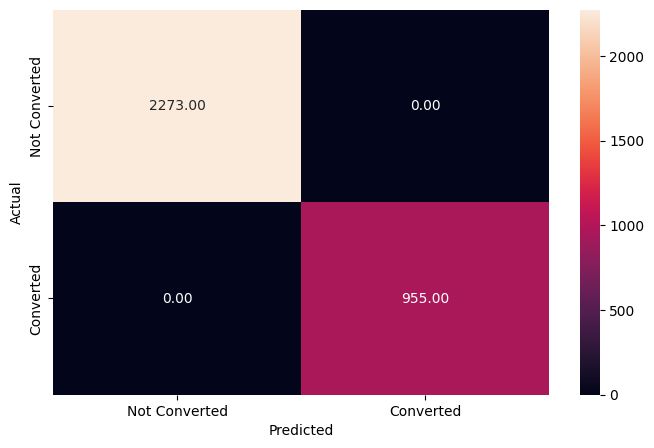

In [60]:
# Predicting on the training data using the Random Forest model
y_pred_train3 = rf.predict(X_train)  # Storing model predictions for the training data

# Printing the F1 score for the training set
print('F1 score for training set =', f1_score(y_train, y_pred_train3))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the training set
metrics_score(y_train, y_pred_train3)

F1 score for test set = 0.7518987341772151
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



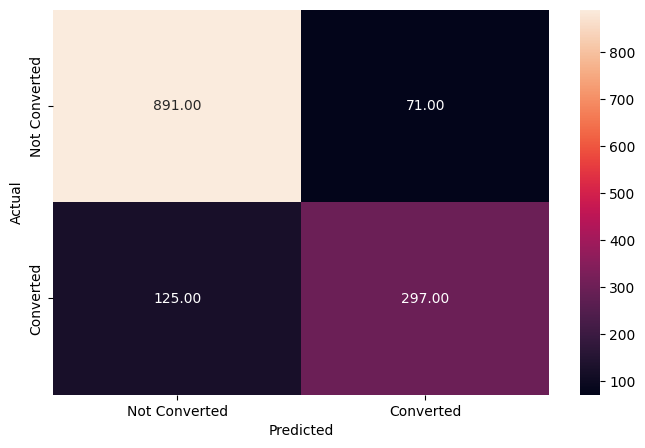

In [61]:
# Predicting on the test data using the Random Forest model
y_pred_test3 = rf.predict(X_test)  # Storing model predictions for the test data

# Printing the F1 score for the test set
print('F1 score for test set =', f1_score(y_test, y_pred_test3))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print a classification report and confusion matrix for the test set
metrics_score(y_test, y_pred_test3)

In [62]:
# Checking the parameters of the classifier
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

**Let's inquire how misclassification error and recall value changes for different maximum depths in train and test data**

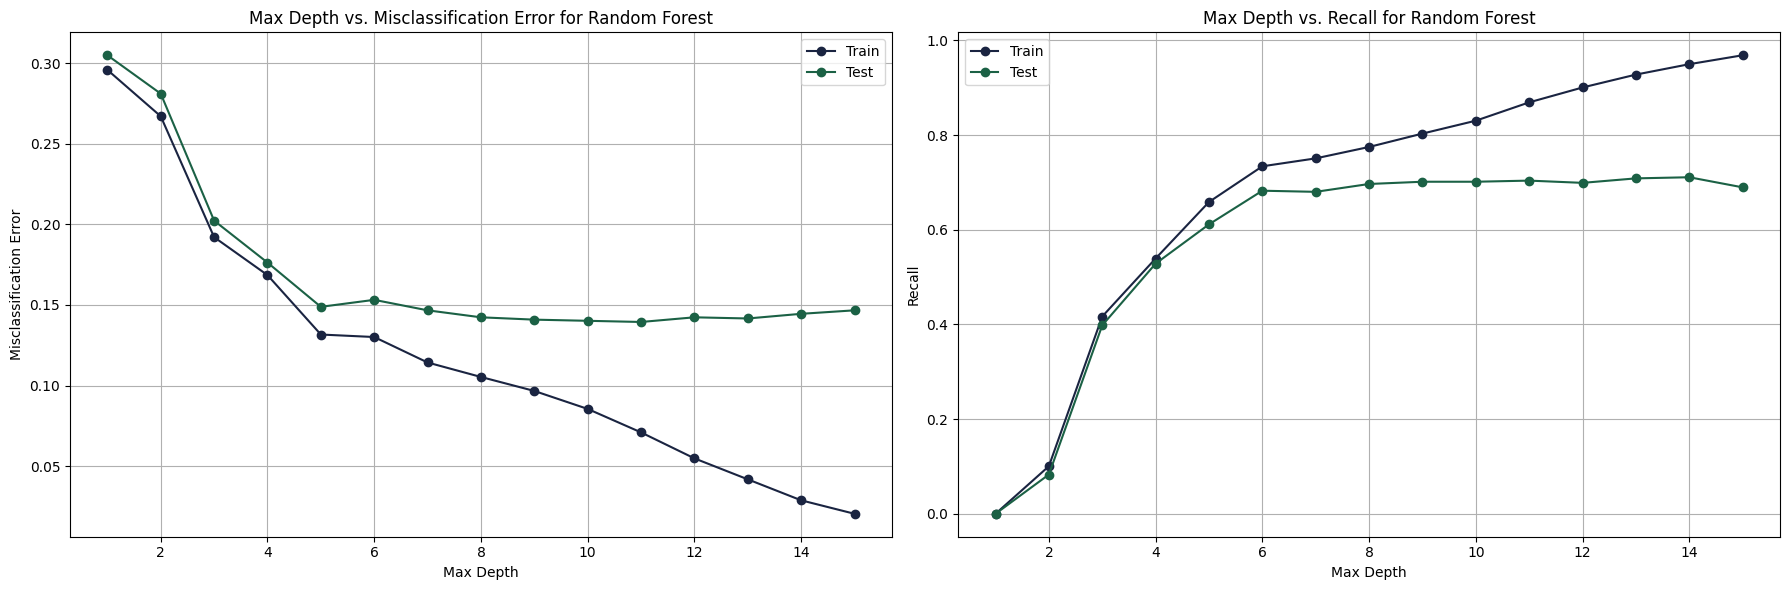

In [63]:
# Define a range of max depth values to test
max_depth_values = range(1, 16)  # Adjust the range as needed

# Initialize empty lists to store metrics
train_errors = []
test_errors = []
train_recalls = []
test_recalls = []

# Create and train Random Forest models with different max depths
for max_depth in max_depth_values:
    rf2 = RandomForestClassifier(criterion="entropy", random_state=7, max_depth=max_depth)
    rf2.fit(X_train, y_train)

    # Predict on the training and test data using rf2 (not rf)
    y_train_pred = rf2.predict(X_train)
    y_test_pred = rf2.predict(X_test)

    # Calculate misclassification errors and append to the lists
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Calculate recall scores and append to the lists
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

# Create subplots for max_depth vs. misclassification error and recall
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Max Depth vs. Misclassification Error
axes[0].plot(max_depth_values, train_errors, label='Train', marker='o')
axes[0].plot(max_depth_values, test_errors, label='Test', marker='o')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Misclassification Error')
axes[0].set_title('Max Depth vs. Misclassification Error for Random Forest')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Max Depth vs. Recall
axes[1].plot(max_depth_values, train_recalls, label='Train', marker='o')
axes[1].plot(max_depth_values, test_recalls, label='Test', marker='o')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Recall')
axes[1].set_title('Max Depth vs. Recall for Random Forest')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

* **From maximum depth of 6, the misclassification error and recall doesn't vary much in the test data.**
* **Seems like, the sweetspot for maximum depth is in the range of 6-10.**

**Let's see graphs of number of estimators vs misclassification errror and recall with maximum depth of 8**

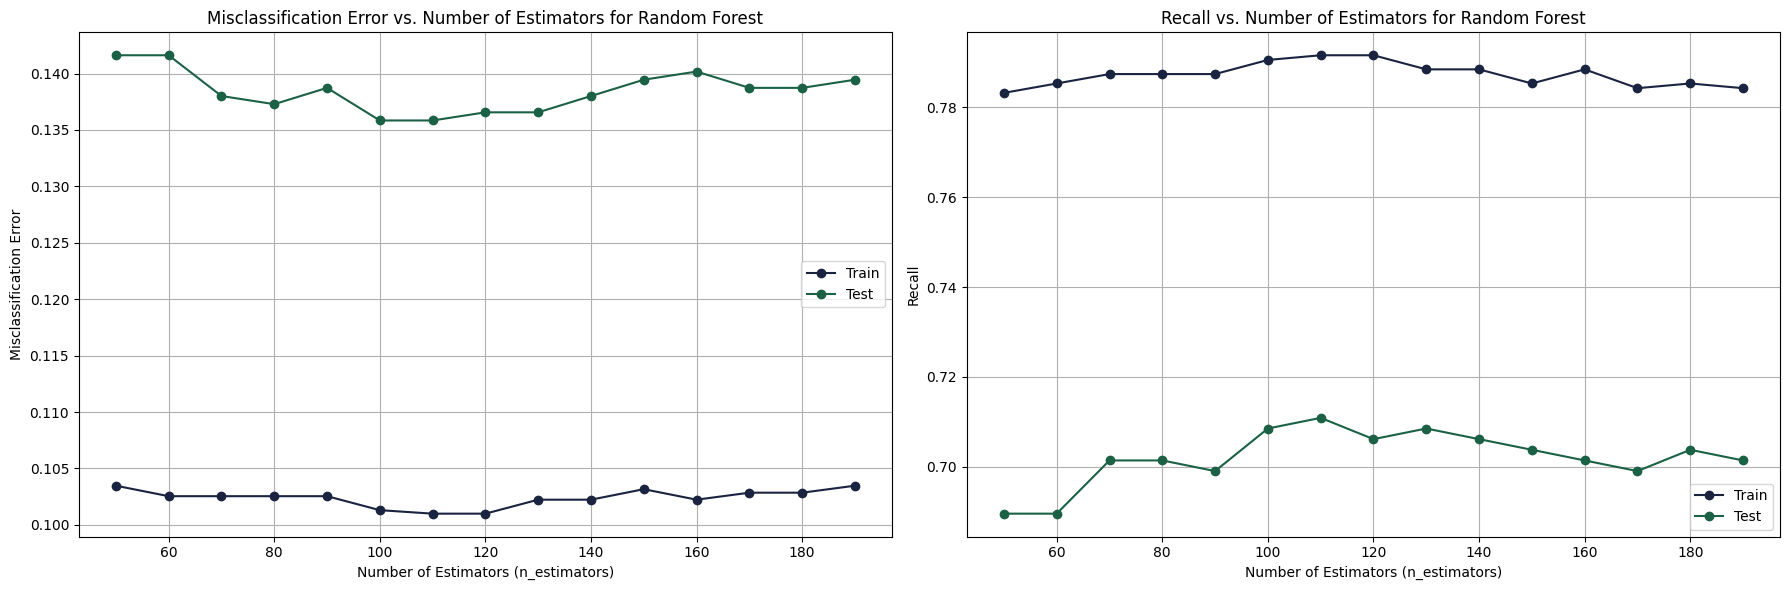

In [64]:
# Define a range of n_estimators values to test
n_estimators_values = range(50, 200, 10)

# Initialize empty lists to store metrics
train_errors = []
test_errors = []
train_recalls = []
test_recalls = []

# Create and train Random Forest models with different n_estimators
for n_estimators in n_estimators_values:
    # Create a Random Forest classifier with the specified n_estimators
    rf3 = RandomForestClassifier(n_estimators=n_estimators, random_state=7, max_depth=8)

    # Train the model on the training data
    rf3.fit(X_train, y_train)

    # Predict on the training and test data
    y_train_pred = rf3.predict(X_train)
    y_test_pred = rf3.predict(X_test)

    # Calculate misclassification errors and append to the lists
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Calculate recall scores and append to the lists
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

# Create subplots for misclassification error and recall vs. n_estimators
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Misclassification Error vs. Number of Estimators
axes[0].plot(n_estimators_values, train_errors, label='Train', marker='o')
axes[0].plot(n_estimators_values, test_errors, label='Test', marker='o')
axes[0].set_xlabel('Number of Estimators (n_estimators)')
axes[0].set_ylabel('Misclassification Error')
axes[0].set_title('Misclassification Error vs. Number of Estimators for Random Forest')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Recall vs. Number of Estimators
axes[1].plot(n_estimators_values, train_recalls, label='Train', marker='o')
axes[1].plot(n_estimators_values, test_recalls, label='Test', marker='o')
axes[1].set_xlabel('Number of Estimators (n_estimators)')
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall vs. Number of Estimators for Random Forest')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

* **Misclassification error decreases and recall value increases in the region of 100-120 n_estimators.**

## **Tree Pruning**

* **The Classifier is clearly overfitting the model as it is not performing well on our test/unseen data. So we need to prune the tree.**

* **From the graph we can see that the misclassification error in the test data does not vary significantly from maximum depth of 6.**

##**Random Forest - Hyperparameter Tuning**

###**RandomizedSearchCV**

In [65]:
# Define ranges for search
param_grid_fine = {
    'n_estimators': np.arange(90,130),
    'max_depth': np.arange(6,11),
    'min_samples_split': np.arange(1,40),
    'min_samples_leaf': np.arange(1,10)
}

# Create a Random Forest classifier
rf4 = RandomForestClassifier(criterion = 'entropy',random_state=7)

# Performing a randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf4,
    param_distributions=param_grid_fine,
    n_iter=30,
    scoring='recall',
    cv=5,
    random_state=7
)

# Fitting the fine search to data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=7),
                   n_iter=30,
                   param_distributions={'max_depth': array([ 6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                        'n_estimators': array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129])},
                   random_state=7, scoring='recall')

In [66]:
# Get the best parameters and best score from the fine-tuned Random Forest model
best_params_fine = random_search.best_params_  # Store the best hyperparameters
best_score_fine = random_search.best_score_  # Store the best cross-validation score

# Print the best score and best parameters
print(best_score_fine)
print(best_params_fine)

0.7319371727748691
{'n_estimators': 122, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}


In [67]:
#Checking parameters
random_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'entropy',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 7,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(criterion='entropy', random_state=7),
 'n_iter': 30,
 'n_jobs': None,
 'param_distributions': {'n_estimators': array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
         103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
         116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127

###**GridSearchCV**

In [68]:
# Number of trees in random forest
n_estimators = [100, 110, 120]
# Maximum number of features to split
max_features =  ['sqrt']
# Maximum number of levels in tree
max_depth = [1, 7, 8, 10]
# Minimum number of samples required to split a node
min_samples_split = [2,10,28]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,10,20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [69]:
# Create the param grid
param_grid = { 'n_estimators': n_estimators,
               'max_features' : max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               "class_weight": ['balanced']
              }
print(param_grid)

{'n_estimators': [100, 110, 120], 'max_features': ['sqrt'], 'max_depth': [1, 7, 8, 10], 'min_samples_split': [2, 10, 28], 'min_samples_leaf': [2, 10, 20], 'bootstrap': [True, False], 'class_weight': ['balanced']}


In [ ]:
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
rf_grid = GridSearchCV(estimator = rf4, param_grid = param_grid,scoring = scorer, cv = 5, verbose=2, n_jobs = -1)

#fitting training data in the model
rf_grid = rf_grid.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = rf_grid.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

In [71]:
# Checking best parameters

rf_tuned.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 120,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

F1 score for training set = 0.7110362257792756
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      2273
           1       0.59      0.88      0.71       955

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.77      3228
weighted avg       0.84      0.79      0.80      3228



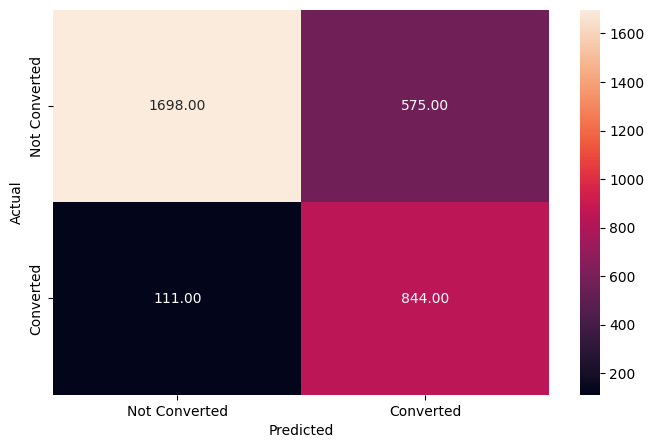

In [72]:
# Predicting on the training data using the tuned Random Forest model
y_pred_train4 = rf_tuned.predict(X_train)  # Storing model predictions for training data

# Printing the F1 score for the training set
print('F1 score for training set =', f1_score(y_train, y_pred_train4))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print classification report and confusion matrix for the training set
metrics_score(y_train, y_pred_train4)

F1 score for test set = 0.7182962245885769
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       962
           1       0.61      0.88      0.72       422

    accuracy                           0.79      1384
   macro avg       0.77      0.81      0.78      1384
weighted avg       0.83      0.79      0.80      1384



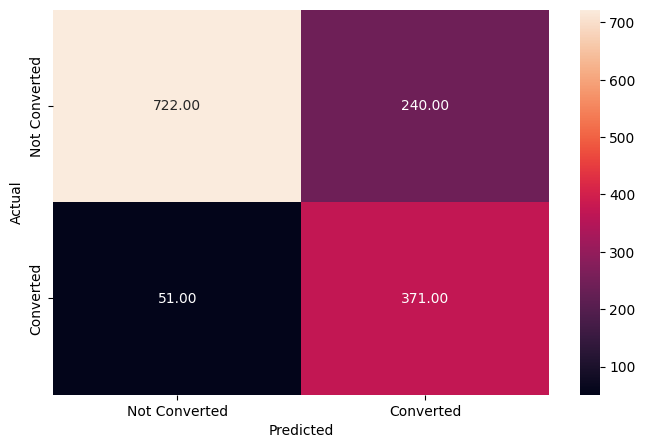

In [73]:
# Predicting on the test data using the tuned Random Forest model
y_pred_test4 = rf_tuned.predict(X_test)

# Printing the F1 score for the test set
print('F1 score for test set =', f1_score(y_test, y_pred_test4))

# Printing a separator line for clarity
print('-' * 50)

# Calling a function 'metrics_score' to print classification report and confusion matrix for the test set
metrics_score(y_test, y_pred_test4)

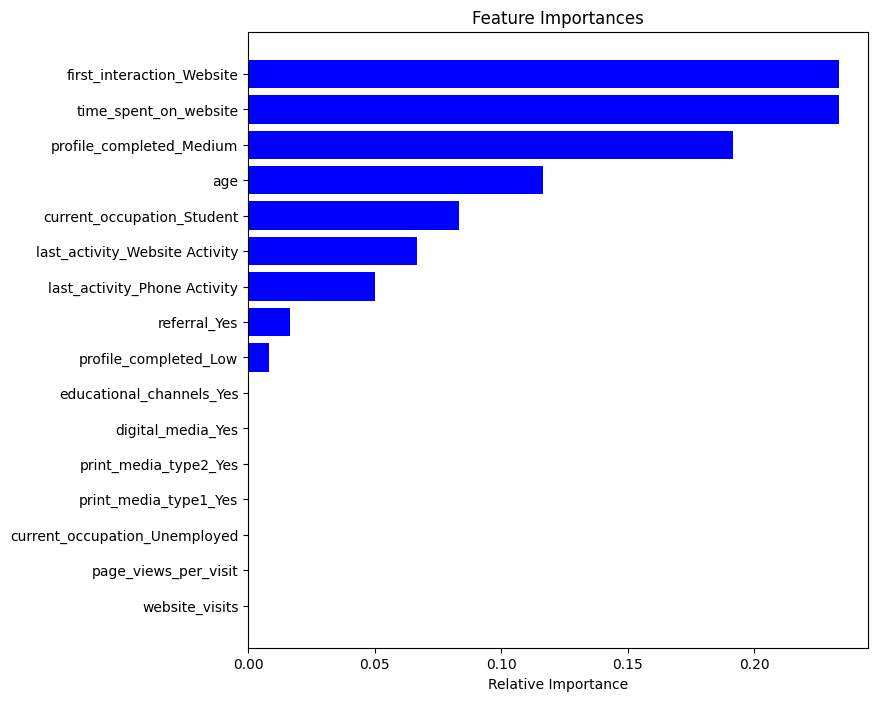

In [74]:
# Get feature importances from the trained Random Forest model
importances = rf_tuned.feature_importances_

# Sort the indices of feature importances in ascending order
indices = np.argsort(importances)

# Get the feature names from the dataset
feature_names = list(X.columns)

# Create a new figure for the feature importances plot
plt.figure(figsize=(8, 8))

# Set the title for the plot
plt.title('Feature Importances')

# Create a horizontal bar plot to visualize the relative importance of each feature
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')

# Set the y-axis ticks to display feature names corresponding to their importance
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Label the x-axis
plt.xlabel('Relative Importance')

# Display the plot
plt.show()

**Observations:**

- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.

- This model gives importance to more factors than the decision tree. Most factors are included in the algorithm to some degree.

- It is interesting to note that it singles out referrals as being apparently more significant than other forms of advertising, which is in accordance with our earlier findings.

##**Result Summary**

In [75]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)  # Predict using the independent variables
    accuracy = accuracy_score(target, pred)  # Accuracy
    precision = precision_score(target, pred)  # Precision
    recall_class1 = recall_score(target, pred, pos_label=1)  # Recall for positive class: 1
    f1 = f1_score(target, pred)  # F1-score
    cm = confusion_matrix(target, pred)  # Confusion Matrix

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall (Class 1)": recall_class1,
            "F1-Score": f1,
            "Confusion Matrix": [cm],
        },
        index=[0],
    )

    return df_perf

In [76]:
# Storing test results for each model in different variables

dt_test = model_performance_classification(clf, X_test, y_test)                   #default tree
dt_tuned_test = model_performance_classification(d_tree_tuned, X_test, y_test)    #tuned tree
rf_test = model_performance_classification(rf, X_test, y_test)                    #default forest
rf_tuned_perf_test = model_performance_classification(rf_tuned, X_test, y_test)   #tuned forest

In [77]:
# Creating DataFrame for the result summary

models_test_comp_df = pd.concat(
    [
        dt_test.T,
        dt_tuned_test.T,
        rf_test.T,
        rf_tuned_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree",
    "Decision tree Tuned",
    "Random Forest",
    "Random Forest Tuned"
]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,Accuracy,Precision,Recall (Class 1),F1-Score,Confusion Matrix
Decision tree,0.81142,0.69031,0.69194,0.69112,"[[831, 131], [130, 292]]"
Decision tree Tuned,0.79697,0.61969,0.86493,0.72206,"[[738, 224], [57, 365]]"
Random Forest,0.85838,0.80707,0.70379,0.75190,"[[891, 71], [125, 297]]"
Random Forest Tuned,0.78974,0.60720,0.87915,0.71830,"[[722, 240], [51, 371]]"


**The random forest(tuned) model performed more than 1% better (0.879) than the decision tree(0.865) in terms of recall value for class 1. F1 scoring, accuracy, and precision are also similar.**

## Actionable Insights and Recommendations

###**Actionable Insights**

* We were able to create a lead conversion prediction model with Random Forest that had a decent overall performance and an ~88% recall rate.

* Based on feature importance from classification and EDA, several factors seem to be influencing conversion:

 1. Time spent on the website
 2. Having one's first interaction through the website
 3. Profile completeness at or above medium

* Followed by:

 4. Professional activity (non-student)
 5. Age (toward late career)
 6. Last activity was through the website

* Also:

 7. Referrals could be playing a role into the conversion decision.

Based on these, late-career professionals who are working or unemployed, who have spent substantial time on the website, possibly finishing their profile, are the leads most likely to convert.

* However, EDA has identified the following issues:

 - The model does not do a satisfactory job of capturing the impact of advertising channels.
 - Additionally, the data does not discuss any potential associations or the combined effects of several advertising sources.
 - Leads who joined without browsing the website have lower conversion rates than those who did.
 - Lead conversion rates are much lower for leads who first engaged with the mobile application.
 - There aren't any details in the data on how time is spent on the website.

###**Business Recommendations**

* **Website Interaction:**

The business should concentrate on website interactions. Perhaps the website's front-end and back-end developers can have a significant impact by making it more persuasive and appealing.

* **App Developement:**

The app may not be user-friendly, users may not be interested in downloading it, or we may be missing out on something. It need more research.

* **Lead Behaviour:**

Knowing what the leads are actually doing on the website will be useful information. That will make things clearer.

* **Promotional Offers:**

Due to the fact that students appear to have the lowest conversion rates, the organization can offer special discounts to them. e.g. The business can deliver tailored messages if it recognizes a customer as a student. Offers that are open to everyone may help improve conversion rates.

* **Advertise Analysis:**

The information given does not make it obvious how advertising channels affect consumers. We can only conclude from the analysis that referral incentives should be considered. e.g. referral code discounts.

* **Incentivize profile completion:**

Increased completion might be achieved by redesigning the questionnaire or adding a reward for finishing the profile.

* **Decide on recall value/budget :**

If the company proposes a fixed recall value according to their budget, then we can focus on precision with a fixed recall value for different models.